<a href="https://colab.research.google.com/github/sc8556/Analysis-of-Spotify-s-most-popular-songs/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%94%BC%EC%9E%90_%EA%B0%80%EA%B2%8C_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리 탐색
---
1.   라이브러리 불러오기
2.   데이터 불러오기
3.   데이터 합치고 전처리 하기
4.   데이터 탐색하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 1) 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트를 'NanumBarunGothic'으로 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 2) 데이터 불러오기

# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 설정
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/코드잇/데이터분석/data/')

orders_df = pd.read_csv('orders.csv')
pizzas_df = pd.read_csv('pizzas.csv')
pizza_types_df = pd.read_csv('pizza_types.csv')
# 데이터 잘 불러왔는지 확인
display(orders_df.head())
display(pizzas_df.head())
display(pizza_types_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,order_timestamp,order_details_id,pizza_id,quantity
0,1,2023-01-01 11:45:11,1,hawaiian_m,1
1,2,2023-01-01 11:53:26,2,big_meat_l,1
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1
3,2,2023-01-01 11:53:26,4,five_cheese_l,1
4,2,2023-01-01 11:53:26,5,potato_m,1


,pizza_id,pizza_name,size,price
0,bbq_ckn_s,바비큐 치킨 피자,S,11300
1,bbq_ckn_m,바비큐 치킨 피자,M,22000
2,bbq_ckn_l,바비큐 치킨 피자,L,34000
3,thai_ckn_s,타이 치킨 피자,S,12300
4,thai_ckn_m,타이 치킨 피자,M,24000


,pizza_name,category,ingredients
0,바비큐 치킨 피자,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
1,타이 치킨 피자,치킨,"치킨, 파인애플, 토마토, 피망, 타이 칠리 소스"
2,빅 미트 피자,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
3,클래식 디럭스 피자,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
4,슈퍼 슈프림 피자,클래식,"페퍼로니, 토마토, 적양파, 그린 올리브, 옥수수, 마늘"


In [ ]:
# 3. 데이터 합치고 전처리하기

# 데이터 합치기 order_df + pizzas_df
merged_order_pizza = pd.merge(orders_df, pizzas_df, how='left', on='pizza_id')
merged_order_pizza.head()

# 실제 주문 금액 계산하기
merged_order_pizza['total_price'] = merged_order_pizza['quantity'] * merged_order_pizza['price']
# 'price' 컬럼명 변경하기 -> unit_price
merged_order_pizza = merged_order_pizza.rename(columns={'price' : 'unit_price'})
merged_order_pizza.head()
# 데이터 합치기 merged_order_pizza + pizza_types_df
pizza_orders_df = pd.merge(merged_order_pizza, pizza_types_df, how='left', on='pizza_name')
pizza_orders_df.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,하와이안 피자,M,21800,21800,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
1,2,2023-01-01 11:53:26,2,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,파이브 치즈 피자,L,31000,31000,베지테리언,"모짜렐라 치즈, 프로볼로네 치즈, 고다 치즈, 페코리노 치즈, 고르곤졸라 치즈"
4,2,2023-01-01 11:53:26,5,potato_m,1,포테이토 피자,M,21800,21800,스페셜,"모짜렐라 치즈, 토마토, 감자, 양파, 베이컨, 옥수수, 마요네즈"


In [ ]:
# 4) 데이터 탐색하기
pizza_orders_df.shape # 행, 열 확인
pizza_orders_df.describe()

,order_id,order_details_id,quantity,unit_price,total_price
count,47079.000000,47079.000000,47079.000000,47079.000000,47079.000000
mean,10708.712058,23540.000000,1.052996,22945.597825,24233.356698
std,6175.450615,13590.680998,0.242338,9376.523771,11887.470629
min,1.000000,1.000000,1.000000,9300.000000,9300.000000
25%,5352.500000,11770.500000,1.000000,11300.000000,12300.000000
50%,10696.000000,23540.000000,1.000000,21800.000000,22000.000000
75%,16100.500000,35309.500000,1.000000,32300.000000,33800.000000
max,21350.000000,47079.000000,5.000000,38800.000000,169000.000000


# 매장 분석 1: 종합 결산

In [ ]:
# 영업일 수 계산
pizza_orders_df['order_timestamp'] = pd.to_datetime(pizza_orders_df['order_timestamp']) # order_timestamp 컬럼 datetime으로 형변환
total_days = pizza_orders_df['order_timestamp'].dt.date.nunique() # 영업일 수 계산 -> nunique()
print(f'영업일 수: {total_days}일')

# 총 매출 계산
total_sales = pizza_orders_df['total_price'].sum()
total_sales = int(total_sales)
print(f'총 매출: {total_sales:,.0f}원')

# 하루 평균 매출 계산
sales_per_day = total_sales/ total_days
print(f'하루 평균 매출: {sales_per_day:,.0f}원')

# 1년동안 들어온 주문 횟수
total_orders = pizza_orders_df['order_id'].nunique()
print(f'주문 횟수: {total_orders:,}회')

# 평균 주문 금액
avg_purchase_price = total_sales / total_orders
print(f'평균 주문 금액: {avg_purchase_price:,.0f}원')

# 피자 총 판매량
total_quantity = pizza_orders_df['quantity'].sum()
print(f'총 판매량 : {total_quantity}판')

# 한 주문에서 피자를 많으면 몇판까지 시켰는지 파악
quantity_per_order = pizza_orders_df.groupby('order_id')['quantity'].sum()
quantity_per_order = quantity_per_order.sort_values(ascending=False)
quantity_per_order.nlargest(5)

pizza_orders_df.query('order_id == 18845')

영업일 수: 358일
총 매출: 1,140,882,200원
하루 평균 매출: 3,186,822원
주문 횟수: 21,350회
평균 주문 금액: 53,437원
총 판매량 : 49574판


,order_id,order_timestamp,order_details_id,pizza_id,quantity,pizza_name,size,unit_price,total_price,category,ingredients
41491,18845,2023-11-18 21:10:53,41492,bbq_ckn_m,3,바비큐 치킨 피자,M,22000,66000,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
41492,18845,2023-11-18 21:10:53,41493,big_meat_l,1,빅 미트 피자,L,34000,34000,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
41493,18845,2023-11-18 21:10:53,41494,big_meat_s,2,빅 미트 피자,S,11300,22600,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
41494,18845,2023-11-18 21:10:53,41495,bulgogi_l,1,불고기 피자,L,32300,32300,스페셜,"불고기, 불고기 소스, 버섯, 양파, 피망, 모짜렐라 치즈"
41495,18845,2023-11-18 21:10:53,41496,classic_dlx_m,1,클래식 디럭스 피자,M,20300,20300,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
41496,18845,2023-11-18 21:10:53,41497,classic_dlx_s,1,클래식 디럭스 피자,S,10800,10800,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
41497,18845,2023-11-18 21:10:53,41498,green_garden_m,1,그린 가든 피자,M,21800,21800,베지테리언,"가지, 아티초크, 토마토, 쥬키니, 피망, 마늘, 페스토 소스"
41498,18845,2023-11-18 21:10:53,41499,hawaiian_l,2,하와이안 피자,L,33800,67600,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
41499,18845,2023-11-18 21:10:53,41500,hawaiian_m,2,하와이안 피자,M,21800,43600,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"
41500,18845,2023-11-18 21:10:53,41501,hawaiian_s,2,하와이안 피자,S,11000,22000,스페셜,"토마토, 베이컨, 파인애플, 모짜렐라 치즈"


#매장 분석 2: 시간에 따른 매출
---
1.   월별 매출
2.   요일별 매출
3.   시간대별 매출
4.   평일과 휴일의 시간대별 매출

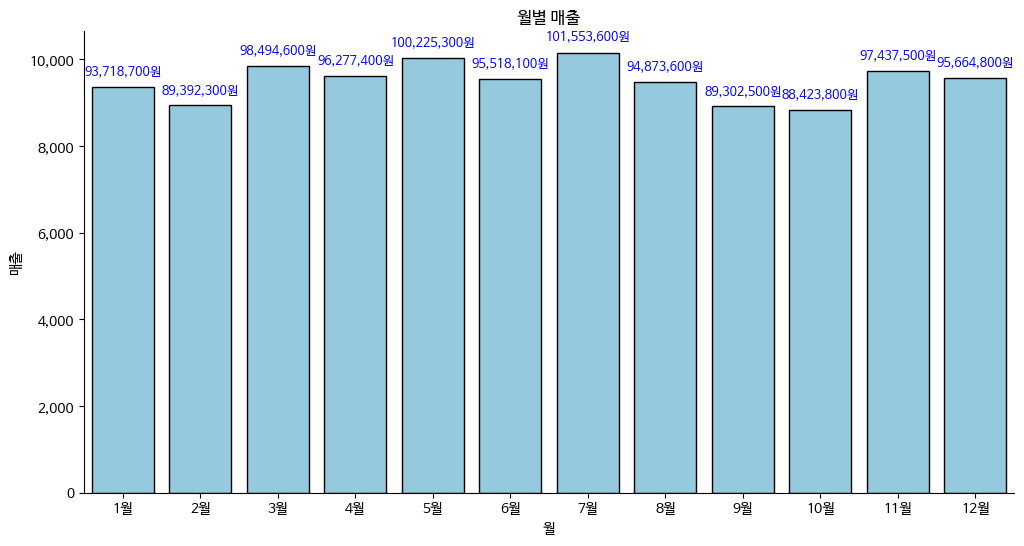

In [ ]:
# 1. 월별 매출

# 'order_timestamp'를 dt.month 함수를 사용하여, month 형식으로 변환
pizza_orders_df['month'] = pizza_orders_df['order_timestamp'].dt.month
pizza_orders_df.head()

# 월별 총 가격의 합 수집
sales_by_month = pizza_orders_df.groupby('month')['total_price'].sum().reset_index()
sales_by_month

# 그래프 생성
plt.rcParams['figure.figsize'] = (12, 6) # 사이즈 설정
sns.barplot(data=sales_by_month,
            x='month', y='total_price',
            color='skyblue', edgecolor='black')
plt.title('월별 매출') # 그래프 제목
plt.xlabel('월') # 그래프 x라벨 설정
plt.ylabel('매출')# 그래프 y라벨 설정

from matplotlib.ticker import FuncFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _ : f'{x/10000:,.0f}')) # 10000단위부터 , 설정 + 소수점 0자리부터 반올림(정수로 만들기)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _ : f'{x+1}월')) # 1월,2월 .. 형식으로 만들기
# 막대에 금액 표시
for i,v in enumerate(sales_by_month['total_price']):
  offset = max(v * 0.02, 50000)
  plt.text(i, v+offset, f'{v:,.0f}원',
          ha='center',va='bottom',
          fontsize=9, color='blue')
# spine 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

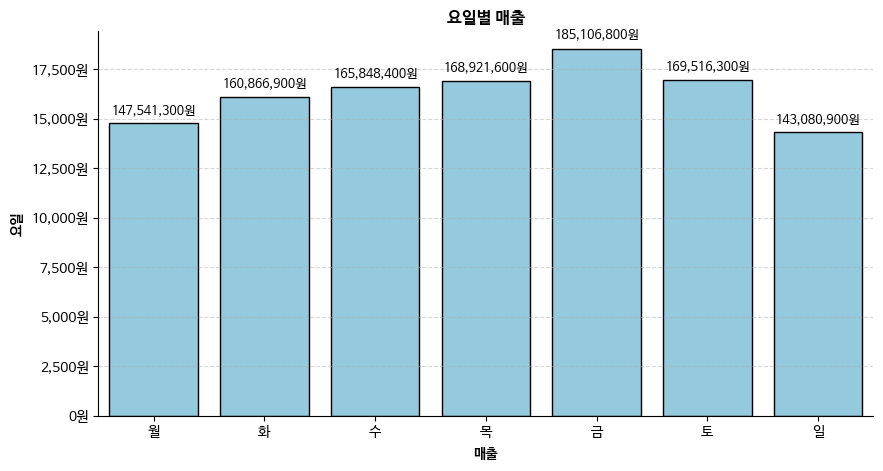

In [ ]:
# 2. 요일별 매출
pizza_orders_df['day'] = pizza_orders_df['order_timestamp'].dt.day_of_week # 요일 컬럼 생성
pizza_orders_df.head()

sales_by_day = pizza_orders_df.groupby('day')['total_price'].sum().reset_index() # 요일별 총 매출 데이터프레임 생성

day_names = ['월', '화', '수', '목', '금','토','일'] # 요일 변수 생성

# 그래프 생성
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=sales_by_day, x=day_names, y='total_price',
            color='skyblue', edgecolor='black')
plt.title('요일별 매출',fontweight='bold')
plt.xlabel('매출',fontweight='bold')
plt.ylabel('요일', fontweight='bold')
# y축 포맷 변경
ax = plt.gca()
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _ : f'{x/10000:,.0f}원'))

# 막대에 금액 표시
for i, v in enumerate(sales_by_day['total_price']):
  offset = max(v * 0.02, 50000)
  plt.text(i, v+offset, f'{v:,.0f}원', ha='center', va='bottom', fontsize=9)

# grid 생성
plt.grid(axis='y', linestyle='--', alpha=0.5)

# spine 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

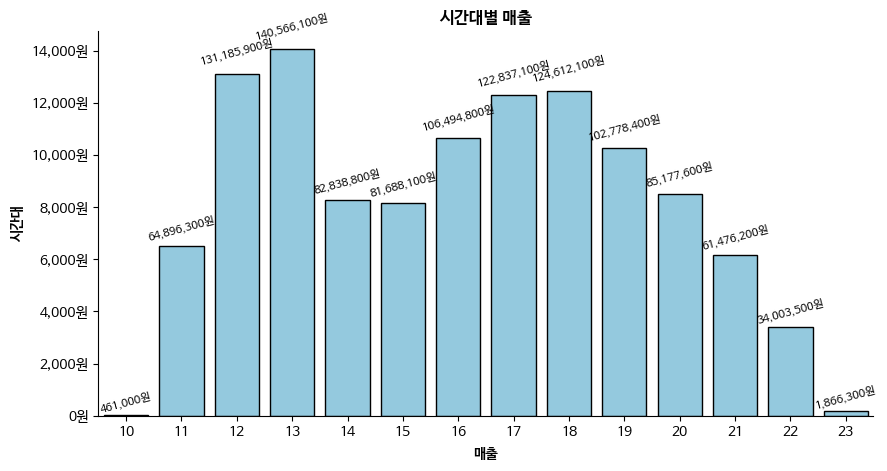

In [ ]:
# 3. 시간대별 매출

pizza_orders_df['hour'] = pizza_orders_df['order_timestamp'].dt.hour
pizza_orders_df['hour']

# 시간별 총 매출 데이터프레임 생성
sales_by_day_hour = pizza_orders_df.groupby('hour')['total_price'].sum().reset_index()

# 그래프 생성
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=sales_by_day_hour, x='hour', y='total_price',
            color='skyblue', edgecolor='black')
plt.title('시간대별 매출',fontweight='bold')
plt.xlabel('매출',fontweight='bold')
plt.ylabel('시간대', fontweight='bold')

# y축 포맷형식 변경
ax = plt.gca()
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _ : f'{x/10000:,.0f}원'))

# 바에 금액 표시
for i, v in enumerate(sales_by_day_hour['total_price']):
  offset = max(v * 0.02, 50000)
  plt.text(i, v+offset, f'{v:,.0f}원', ha='center', va='bottom',
           fontsize=8, rotation=15)

# spines제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


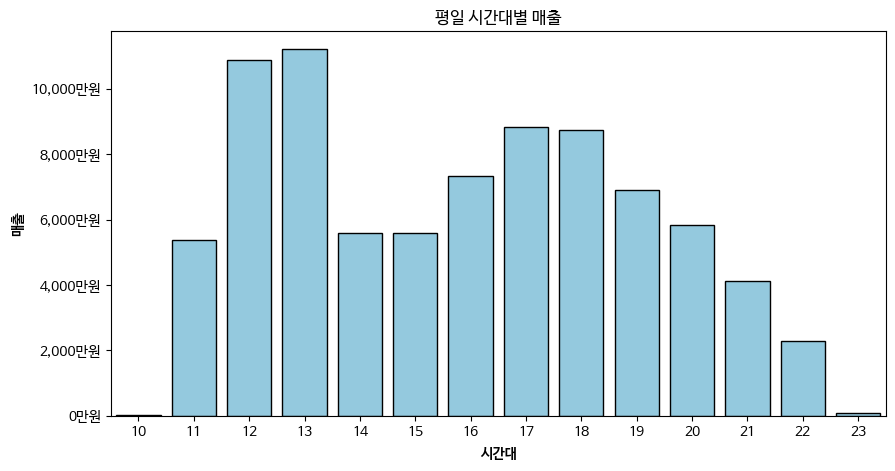

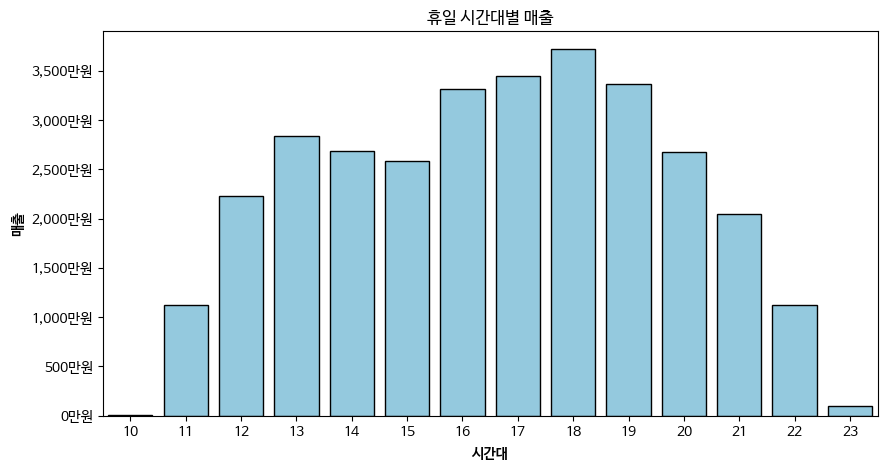

In [ ]:
# 4. 평일과 휴일의 시간대별 매출
pizza_orders_df['type_of_day'] = pizza_orders_df['day'].apply(lambda x: '휴일' if x >= 5 else '평일')
pizza_orders_df.head()

# 평일이나 휴일별 시간대별 매출 구하기
sales_by_day_hour = pizza_orders_df.groupby(['type_of_day','hour'])['total_price'].sum().reset_index()
sales_by_day_hour.head()

# 그래프 생성
day_types = ['평일', '휴일'] # 평일, 휴일 값 리스트에 저장
for day in day_types:
  target_data = sales_by_day_hour[sales_by_day_hour['type_of_day'] == day]
  plt.rcParams['figure.autolayout'] # 캔버스 크기 설정
  sns.barplot(data=target_data, x='hour', y='total_price', color='skyblue', edgecolor='black') # 그래프 생성
  plt.title(f'{day} 시간대별 매출') # 제목 입력
  plt.xlabel('시간대', fontweight='bold') # x라벨 입력
  plt.ylabel('매출', fontweight='bold') # y라벨 입력
  # 금액 포맷 변경
  ax = plt.gca()
  ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _ : f'{x/10000:,.0f}만원'))
  plt.show()

#매장 분석 3: 메뉴에 따른 판매량
---
1.   피자 메뉴별 판매량
2.   각 피자 메뉴의 월별 판매량
3.   각 피자 메뉴의 사이즈별 판매량

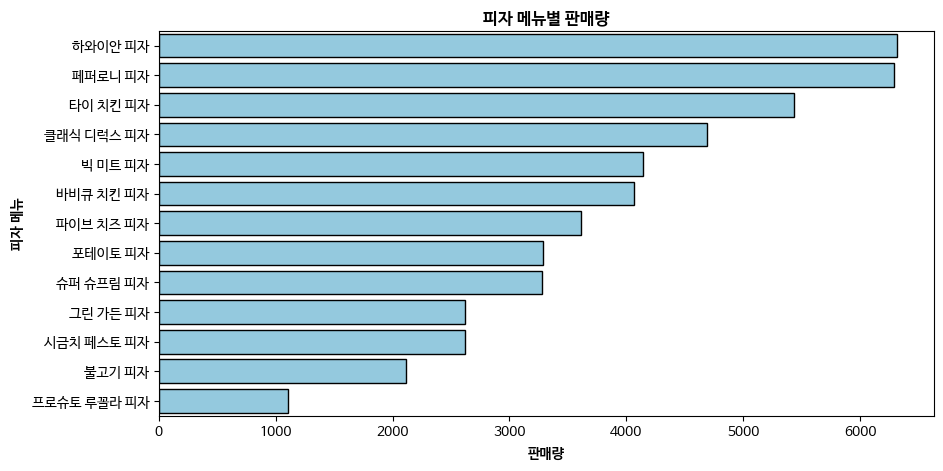

In [ ]:
# 1. 피자 메뉴별 판매량
quantity_by_pizzas = pizza_orders_df.groupby(['pizza_name'])['quantity'].sum().reset_index() # 피자명별 주문량의 합 데이터프레임 생성
quantity_by_pizzas.sort_values(by='quantity', ascending=False, inplace=True) # 내림차순 정렬 (그래프 직관적으로 보기 위해)
quantity_by_pizzas

# 그래프 생성
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=quantity_by_pizzas, x='quantity', y='pizza_name',
            color='skyblue', edgecolor='black')
plt.title('피자 메뉴별 판매량', fontweight='bold')
plt.xlabel('판매량', fontweight='bold')
plt.ylabel('피자 메뉴', fontweight='bold')
plt.show()

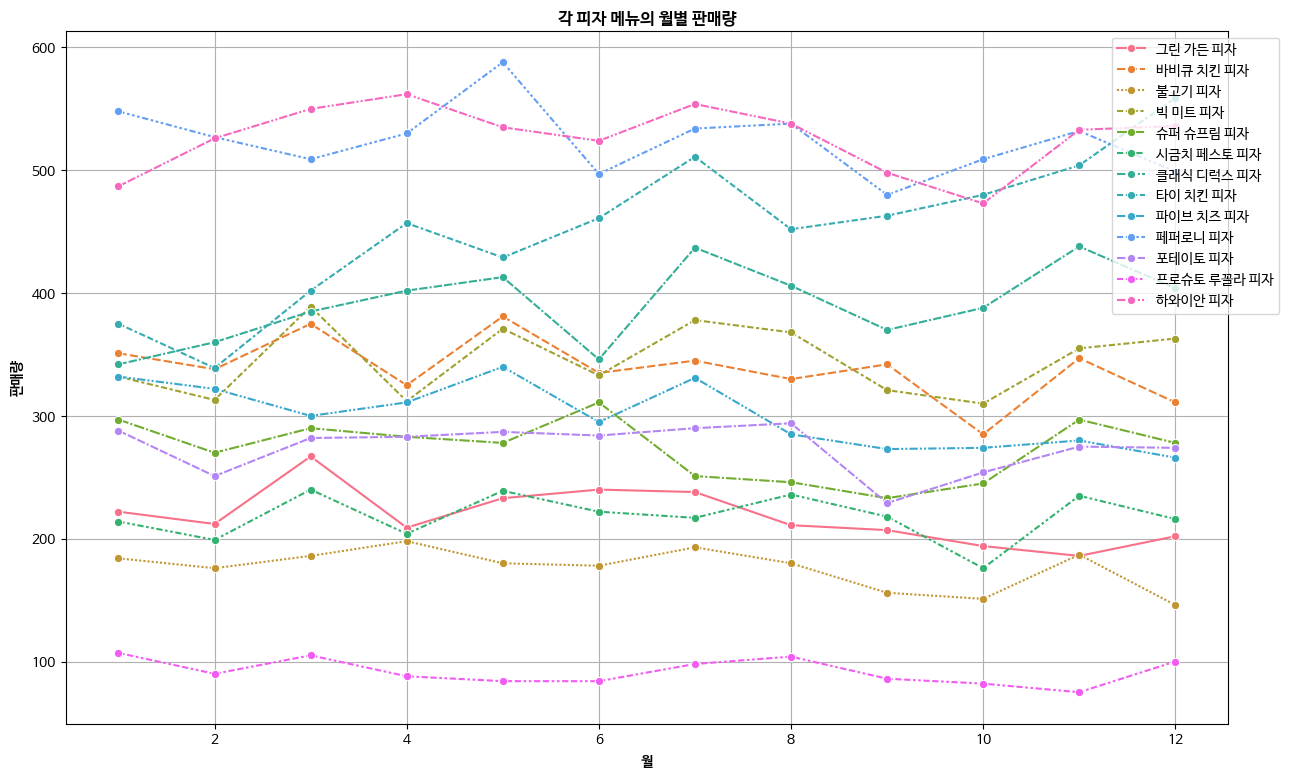

In [ ]:
# 각 피자 메뉴의 월별 판매량
quantity_by_pizza_month = pizza_orders_df.groupby(['pizza_name', 'month'])['quantity'].sum().reset_index()

plt.rcParams['figure.figsize'] = (15,9)
sns.lineplot(data=quantity_by_pizza_month, x='month', y='quantity', hue='pizza_name', style='pizza_name', marker='o')
plt.title('각 피자 메뉴의 월별 판매량', fontweight='bold')
plt.xlabel('월', fontweight='bold')
plt.ylabel('판매량', fontweight='bold')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1)) # 범례 위치 변경, bbox_to_anchor는 xpos와 ypos 인듯
plt.show()

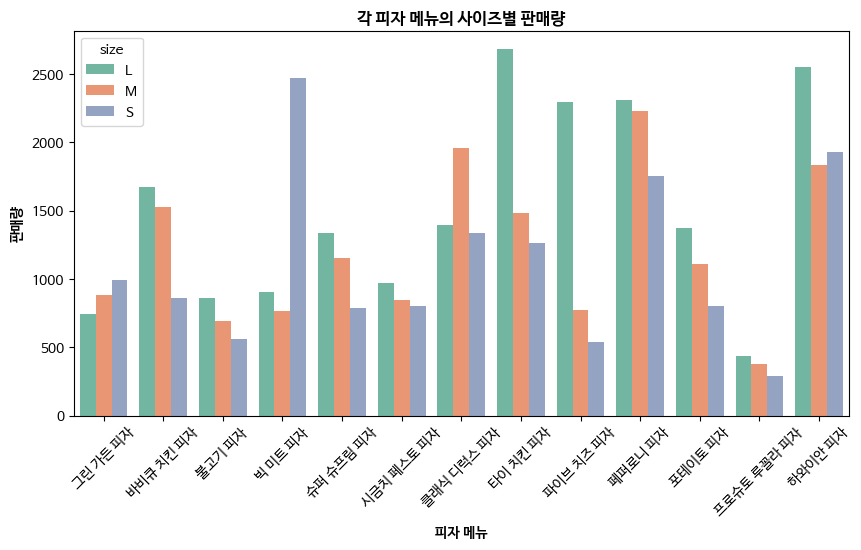

In [ ]:
# 각 피자 메뉴의 사이즈별 판매량
quantity_pizza_and_size = pizza_orders_df.groupby(['pizza_name','size'])['quantity'].sum().reset_index()
# 그래프 생성
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=quantity_pizza_and_size, x='pizza_name', y='quantity', hue='size', palette='Set2')
plt.title('각 피자 메뉴의 사이즈별 판매량', fontweight='bold')
plt.xlabel('피자 메뉴', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('판매량', fontweight='bold')
plt.show()

#매장 분석 4: 카테고리별 판매량
---
1.   피자 카테고리별 판매량

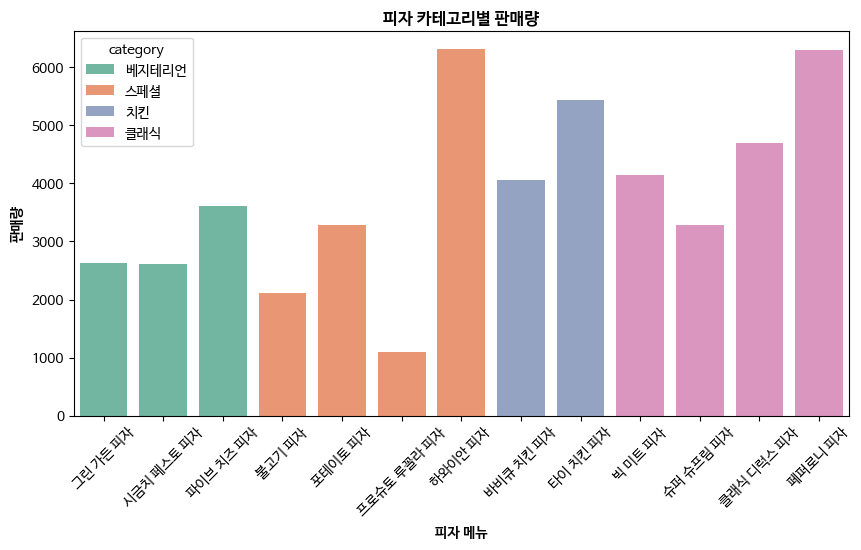

In [ ]:
# 피자 카테고리별 판매량
quantity_by_category_pizza = pizza_orders_df.groupby(['category', 'pizza_name'])['quantity'].sum().reset_index()
# 그래프 생성
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(data=quantity_by_category_pizza, x='pizza_name', y='quantity', hue='category', palette='Set2')
plt.title('피자 카테고리별 판매량', fontweight='bold')
plt.xlabel('피자 메뉴', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('판매량', fontweight='bold')
plt.show()

In [ ]:
pizza_orders_df.head()
# 재료 ,로 스플릿 (재료 데이터 전처리)
pizza_orders_df['ingredients_handle'] = pizza_orders_df['ingredients'].str.split(',')
pizza_orders_df.head()

# 리스트형 데이터를 여러 로우에 걸쳐 펼칠 때 explode 함수 사용
pizza_orders_df = pizza_orders_df.explode('ingredients_handle')
pizza_orders_df['ingredients_handle'] = pizza_orders_df['ingredients_handle'].str.strip()
pizza_orders_df.head()

# 피자 사이즈에 가중치 부여
size_weight = {'S':1, 'M':2, 'L':3}
pizza_orders_df['size_weight'] = pizza_orders_df['size'].map(size_weight)
pizza_orders_df['ingredients_handle'].unique()

array(['토마토', '베이컨', '파인애플', '모짜렐라 치즈', '페퍼로니', '살라미', '초리조', '버섯', '적양파',
       '피망', '프로볼로네 치즈', '고다 치즈', '페코리노 치즈', '고르곤졸라 치즈', '감자', '양파',
       '옥수수', '마요네즈', '치킨', '타이 칠리 소스', '그린 올리브', '마늘', '바비큐 소스', '프로슈토',
       '루꼴라', '가지', '아티초크', '쥬키니', '페스토 소스', '시금치', '썬드라이 토마토', '불고기',
       '불고기 소스'], dtype=object)

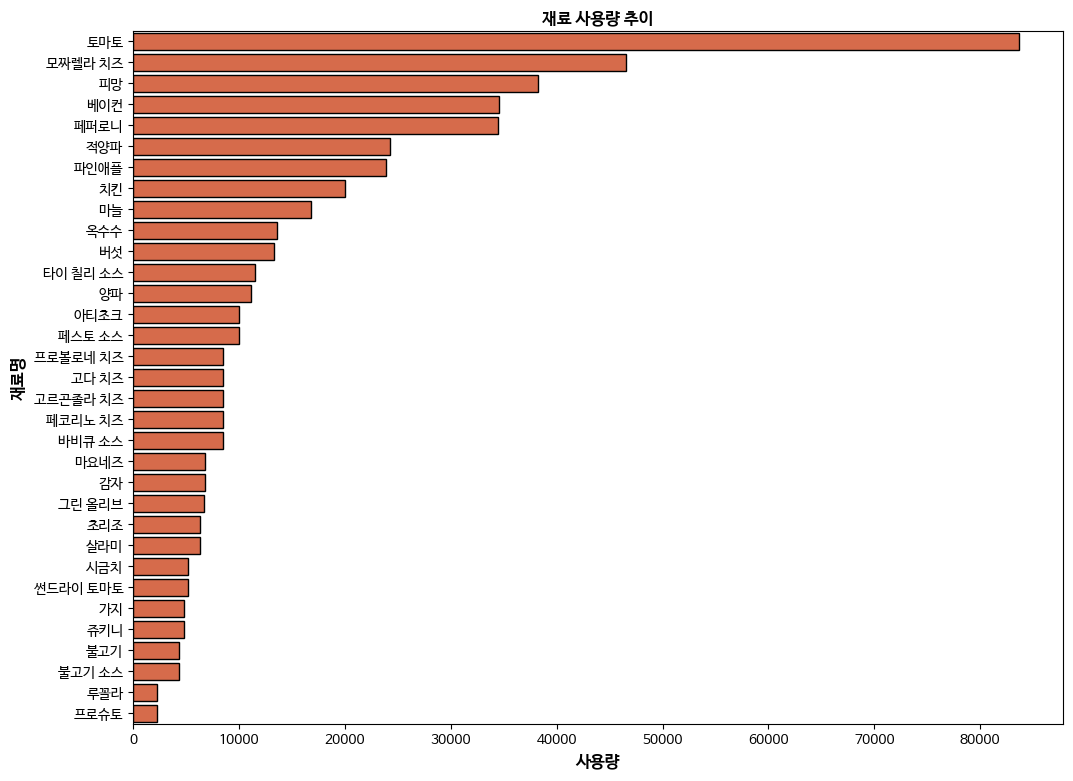

In [ ]:
# 재료 사용량 계산
ingredients_usage = pizza_orders_df.groupby('ingredients_handle')['size_weight'].sum().sort_values(ascending=False)
ingredients_usage.head()

# 재료가 어떤 피자에 들어가는지 확인
used_pizzas = pizza_orders_df.groupby('ingredients_handle')['pizza_name'].unique().reset_index()
used_pizzas.head(20)
ingredients_usage_and_pizzas = pd.merge(ingredients_usage, used_pizzas, how='left', on='ingredients_handle')
ingredients_usage_and_pizzas.head(20)

# 그래프 생성
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(data=ingredients_usage_and_pizzas, x='size_weight', y='ingredients_handle',
            color='#ed5f34', edgecolor='black')
plt.title('재료 사용량 추이', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.xlabel('사용량', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('재료명', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()